# Colab データインストール

In [0]:
# 以下を実行すると、認証情報を取得するための許可を求められるので、許可してトークンを発行し、テキストボックスに貼り付ける。
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()

In [0]:
# Colabにおいてデータを読みこむ。グーグルドライブをマウントします。その為に必要なパッケージを取得しておく。
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse


In [6]:
# 以下実行により、今度は google-drive-ocamlfuse によるアクセスの許可を聞かれる。これも許可する。
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [7]:
# 今回は指定したフォルダのみマウントする
!cp -f ~/.gdfuse/default/config config
!sed -i -e "s/^root_folder=$/root_folder=1FwGdPnKlcYYRe1mZGE5Ci-PWlIY8k5J7/" config
# 上記が正常に終われば、ようやくマウントが可能となる。
!mkdir -p drive
!google-drive-ocamlfuse -config ./config -cc drive
!ls drive

Clearing cache...done
8_3-4			    dataset				  test.ipynb
compare-deeplibs.ipynb	    Kaggle_0				  week3-EDA
dataマウントテンプレ.ipynb  Santander_Value_Prediction_Challenge  week4


In [1]:
# これ以降はターミナルと同様にディレクトリを扱える
cd drive/dataset

/content/drive/dataset


In [2]:
ls

Home Credit Default Risk/  Mercedes-Benz Greener Manufacturing/
House Prices_data/         Porto Seguro’s Safe Driver Prediction/
Instacart Market Basket/   Titanic/


In [3]:
cd Home Credit Default Risk

/content/drive/dataset/Home Credit Default Risk


In [4]:
ls

application_test.csv                           installments_payments.csv
application_train.csv                          POS_CASH_balance.csv
bureau_balance.csv                             previous_application.csv
bureau.csv                                     sample_submission.csv
credit_card_balance.csv                        submission2.csv
HomeCredit_columns_description.csv             submission3.csv
HomeCredit_columns_description.ods             submission.csv
HomeCredit_columns_description.ods (7efe7569)  train_profile.html


# Home Credit Default Risk Competition

## Imports

In [0]:
# pandas and numpy for data manipulation
import numpy as np
import pandas as pd 

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [0]:
# pandasのデータを全て表示
# pd.set_option('display.max_columns', 300)
# pd.set_option('display.max_row', 300)

## Read in Data 

In [7]:
train = pd.read_csv("application_train.csv")
test = pd.read_csv("application_test.csv")
print("Train rows and columns : ", train.shape)
print("Test rows and columns : ", test.shape)

Train rows and columns :  (307511, 122)
Test rows and columns :  (48744, 121)


In [8]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Missing data

In [0]:
# データの処理を行うにあたって、trainデータとtestデータを結合する
total_data = pd.concat([train, test], join='inner')

# innerにすることで、TARGETカラムを含まず結合されている

In [10]:
total_data.shape

(356255, 121)

In [11]:
def Drop_nan(Data):
     
     # 自動車を所有していない人は、"OWN_CAR_AGE"がnanになっているので、0で埋める。
    Data["OWN_CAR_AGE"]=Data["OWN_CAR_AGE"].fillna(0)
    
    
    #  欠損が20000以上ある特徴量は削除することにする。
    total_anynull_df_dropNull  =  Data.dropna(thresh=200000,axis=1)
    total_anynull_df_dropNull.shape,    Data.shape
    pd.DataFrame(total_anynull_df_dropNull.isnull().sum().sort_values(ascending=False))
    
    
    # "OCCUPATION_TYPE"の欠損の穴埋め。nanのところは"No workとして穴埋め。"
    total_anynull_df_dropNull["OCCUPATION_TYPE"].unique()
    total_anynull_df_dropNull["OCCUPATION_TYPE"]=total_anynull_df_dropNull["OCCUPATION_TYPE"].fillna("No work")
    
    #  "CNT_FAM_MEMBERS"の欠損の穴埋め。nanは中央値で穴埋め。
    total_anynull_df_dropNull["CNT_FAM_MEMBERS"]=total_anynull_df_dropNull["CNT_FAM_MEMBERS"] .fillna(total_anynull_df_dropNull["CNT_FAM_MEMBERS"].median())
    total_anynull_df_dropNull["CNT_FAM_MEMBERS"].isnull().any()
    
    
    #  "DAYS_LAST_PHONE_CHANGE"の欠損の穴埋め。nanは中央値で穴埋め。
    total_anynull_df_dropNull["DAYS_LAST_PHONE_CHANGE"]=total_anynull_df_dropNull["DAYS_LAST_PHONE_CHANGE"] .fillna(total_anynull_df_dropNull["DAYS_LAST_PHONE_CHANGE"].median())
    total_anynull_df_dropNull["DAYS_LAST_PHONE_CHANGE"].isnull().any()
    
    
    #  "NAME_TYPE_SUITE"の欠損の穴埋め。nanは"Unaccompanied"で穴埋め。
    total_anynull_df_dropNull["NAME_TYPE_SUITE"]=total_anynull_df_dropNull["NAME_TYPE_SUITE"].fillna("Unaccompanied")
    total_anynull_df_dropNull["NAME_TYPE_SUITE"].isnull().any()
    
    #残りの欠損値の確認
    pd.DataFrame(total_anynull_df_dropNull.isnull().sum().sort_values(ascending=False))
    
    #total_anynull_df_dropNull
    
    
    # 欠損値のある特徴量をリストにする。
    Null_list=list(total_anynull_df_dropNull.loc[ :,total_anynull_df_dropNull.isnull().any() ].columns)
    
    #Null_list
    
    
    #  残りの欠損値については、各特徴量の平均で穴埋め。
    for i in Null_list:
        total_anynull_df_dropNull[i] = total_anynull_df_dropNull[i].fillna(total_anynull_df_dropNull[i].mean())
    
    
    #  欠損が取り除けたかどうか確認。Falseが返ってくれば問題なし。
    return pd.DataFrame(total_anynull_df_dropNull)
  
total_data = Drop_nan(total_data)
print(total_data.isnull().any().any())

False


## Categorical variables

In [12]:
# Label_encoder
def Label_encode(Data):
    le = LabelEncoder()
    le_count = 0

    for col in list(Data.columns):
        if Data[col].dtype == 'object':
            if len(list(Data[col].unique())) <= 2:
                le.fit(Data[col])

                Data[col] = le.transform(Data[col])

                #何を いくつ変換したか記録する
                print(col)
                le_count += 1
            
    return  Data
  
  
# One-Hot Encoder
def One_hot_Encode(Data):
    Data = pd.get_dummies(Data)
    return Data

total_data = Label_encode(total_data)
total_data = One_hot_Encode(total_data)

NAME_CONTRACT_TYPE
FLAG_OWN_CAR
FLAG_OWN_REALTY


## 外れ値を除く

EDAをして情報収集すると'DAYS_EMPLOYED'に外れ値が含まれていることがわかります。  

In [13]:
# 勤務日数が1000年ということになっている(=異常値)
total_data['DAYS_EMPLOYED'].describe()

count    356255.000000
mean      64317.231413
std      141705.532576
min      -17912.000000
25%       -2781.000000
50%       -1224.000000
75%        -290.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

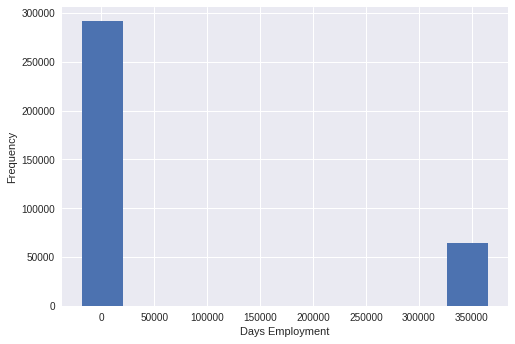

In [14]:
# グラフでも確認して見る
total_data['DAYS_EMPLOYED'].plot.hist();
plt.xlabel('Days Employment');

In [0]:
err = total_data[total_data['DAYS_EMPLOYED'] == 365243]
not_err = total_data[total_data['DAYS_EMPLOYED'] != 365243]

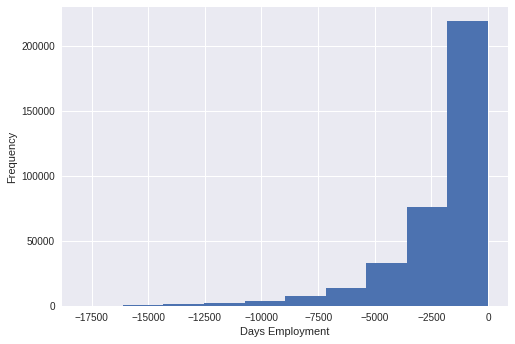

In [16]:
# Create an err flag column
total_data['DAYS_EMPLOYED_err'] = total_data["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
total_data['DAYS_EMPLOYED'].replace({365243: 0}, inplace = True)

# グラフで消えたのを確認する
total_data['DAYS_EMPLOYED'].plot.hist();
plt.xlabel('Days Employment');

## Modeling

モデルがうまく走るか少数のデータで実行して検証。

In [0]:
# total_dataの中にあるtestデータ分をrecoverする
X_train = total_data.iloc[:307511, :]

In [0]:
# Split Data

# trainデータを目的変数と説明変数に分ける
from sklearn.model_selection import train_test_split

y = train['TARGET']
X = X_train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


### LightGBM

In [19]:
!pip install lightgbm

In [0]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

from sklearn.model_selection import KFold, cross_val_score

# LGBMのパラメータの設定
lgm_params = {
          'objective' : 'binary',
          'boosting_type': 'gbdt',
          'metric' : 'auc',
          'nthread' : 4,
          'shrinkage_rate':0.01,
          'max_depth':18,
          'min_child_weight': 2,
          'bagging_fraction':0.65,
          'feature_fraction':0.8,
          'lambda_l1':1,
          'lambda_l2':1,
          'num_leaves':35}        

# LGBMのモデルの作成
lgbm_model = lgb.train(lgm_params, lgb.Dataset(X_train, y_train), 3000, 
                       [lgb.Dataset(X_train, y_train), lgb.Dataset(X_test, y_test)], verbose_eval=10, early_stopping_rounds=20)

# 記録　[1139]	valid_0's auc: 0.794641	valid_1's auc: 0.754739

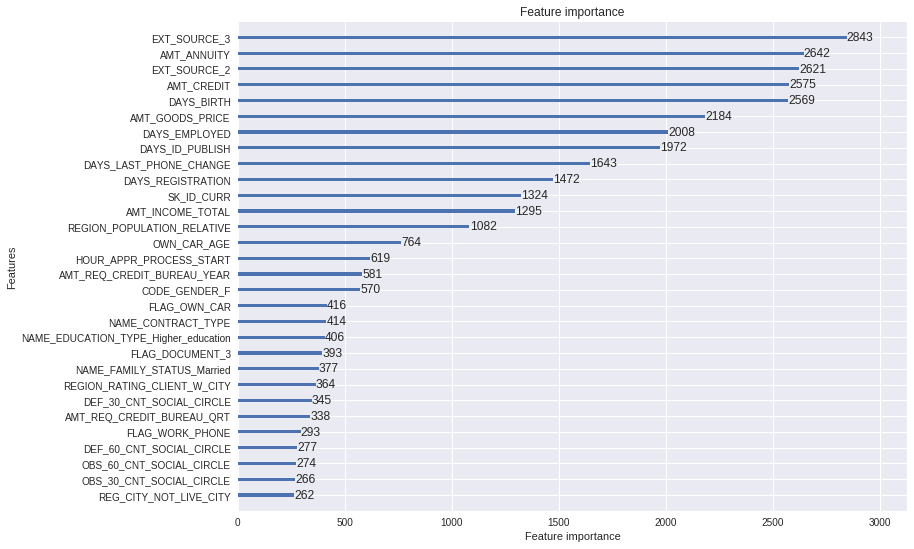

In [26]:
lgb.plot_importance(lgbm_model, max_num_features=30, figsize=(12, 9))

## Submission

In [0]:
# testデータの整形されたものを抽出
Y_totaltest = total_data.iloc[307511:, :]

In [0]:
# sklearnのpredictでデータを予測
rezult = lgbm_model.predict(Y_totaltest)

In [101]:
rezult

array([0.05780003, 0.20068403, 0.01827068, ..., 0.06516114, 0.06786343,
       0.15477103])

In [102]:
# 形を確認
rezult.shape

(48744,)

In [0]:
# サンプルを確認する
submission = pd.read_csv("sample_submission.csv")

In [104]:
# サンプルの形と自分のものが一致しているか確認
submission

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5
5,100042,0.5
6,100057,0.5
7,100065,0.5
8,100066,0.5
9,100067,0.5


In [105]:
# IDを付与する
submission.iloc[:, 1] = rezult
submission

,SK_ID_CURR,TARGET
0,100001,0.057800
1,100005,0.200684
2,100013,0.018271
3,100028,0.046939
4,100038,0.136088
5,100042,0.036092
6,100057,0.021548
7,100065,0.063933
8,100066,0.016755
9,100067,0.056989


In [0]:
# カレントディレクトリにcsvを保存
submission.to_csv('submission3.csv', index= False)

# Note section (EDA)

## Missing data

In [0]:
# 欠損値を含むカラムを抽出
anynull_df=train.loc[:,train.isnull().any()]
anynull_df

,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,24700.5,351000.0,Unaccompanied,NaN,Laborers,1.0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.0000,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,35698.5,1129500.0,Family,NaN,Core staff,2.0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.0800,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6750.0,135000.0,Unaccompanied,26.0,Laborers,1.0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29686.5,297000.0,Unaccompanied,NaN,Laborers,2.0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,21865.5,513000.0,Unaccompanied,NaN,Core staff,1.0,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
5,27517.5,454500.0,"Spouse, partner",NaN,Laborers,2.0,NaN,0.354225,0.621226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0
6,41301.0,1395000.0,Unaccompanied,17.0,Accountants,3.0,0.774761,0.724000,0.492060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-1562.0,0.0,0.0,0.0,1.0,1.0,2.0
7,42075.0,1530000.0,Unaccompanied,8.0,Managers,2.0,NaN,0.714279,0.540654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-1070.0,0.

欠損を含むカラムだけを表示させてそれぞれの意味を確認しどのように処理するか検討

In [0]:
pd.DataFrame(anynull_df.columns)

,0
0,AMT_ANNUITY
1,AMT_GOODS_PRICE
2,NAME_TYPE_SUITE
3,OWN_CAR_AGE
4,OCCUPATION_TYPE
5,CNT_FAM_MEMBERS
6,EXT_SOURCE_1
7,EXT_SOURCE_2
8,EXT_SOURCE_3
9,APARTMENTS_AVG


In [0]:
# 欠損値が多い順に並べる
total_null = train.isnull().sum().sort_values()[::-1]
total_null[:15]

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_AVG     213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_MEDI       210199
LIVINGAPARTMENTS_MODE       210199
LIVINGAPARTMENTS_AVG        210199
FLOORSMIN_MEDI              208642
FLOORSMIN_MODE              208642
FLOORSMIN_AVG               208642
YEARS_BUILD_MEDI            204488
YEARS_BUILD_AVG             204488
dtype: int64

In [0]:
# 割合で確認(全てのカラムを表示)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values()[::-1]
missing_train_data  = pd.concat([total_null, percent], axis=1, keys=['total_null', 'Percent'])
missing_train_data

,total_null,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


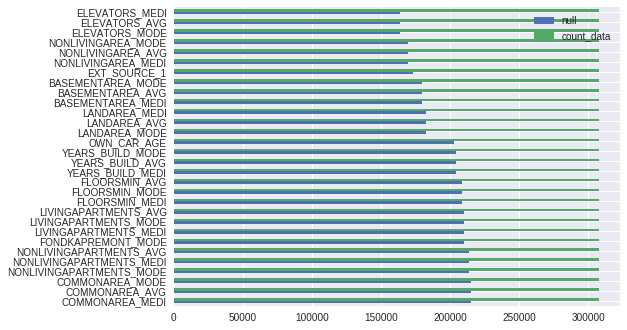

In [0]:
# 欠損の割合をグラフ化
null = train.isnull().sum()
count_data = train.isnull().count()

null_train_data  = pd.concat([null, count_data], axis=1, keys=['null', 'count_data']).sort_values(by=['null'])[::-1]
plt.figure(figsize=(12,5))
null_train_data[:30].plot.barh()

### 欠損値の種類

ここで欠損値の種類について一般論を確認しておく。

欠損値には以下のように、大きく分けて3種類ある。(Little and Rubin, 2002, pp.11-12,　pp.312-313)。

- Missing Completely At Random (MCAR):完全にランダムな欠損。

- Missing At Random (MAR):別の変数に依存して発生している欠損

- Missing Not At Random (MNAR):その変数自体に原因がある場合。


それぞれに応じて欠損値の処理方法もいろいろあるようだが、完全情報最尤推定法もしくは多重代入法と呼ばれる方法であれば、もとの情報を損失せずに補完できるようである。

その他に、欠損が上記分類のどれに該当するのかを統計処理で確認する方法や、欠損の種類に対する処理の仕方がどのくらい影響するのかといった部分なども確認する必要がある。

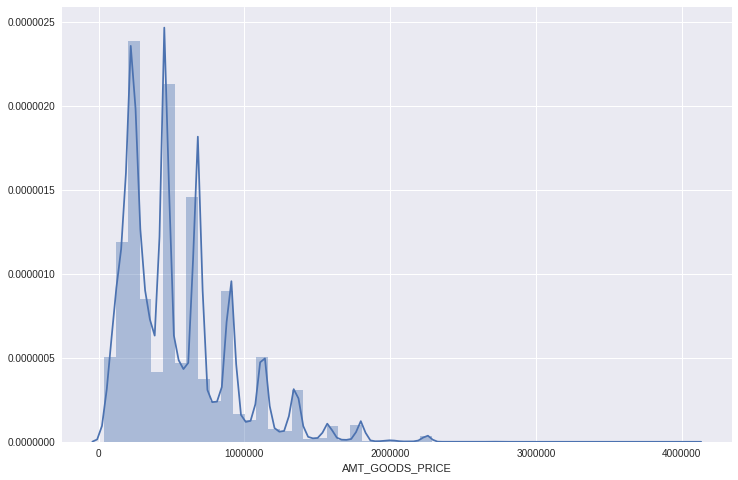

In [0]:
plt.figure(figsize=(12,8))
sns.distplot(train["AMT_GOODS_PRICE"].dropna())

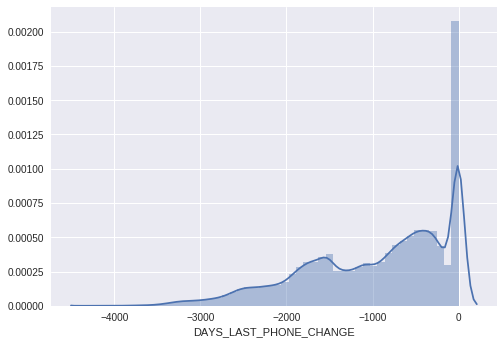

In [0]:
sns.distplot(train["DAYS_LAST_PHONE_CHANGE"].dropna())

In [0]:
# データの処理を行うにあたって、trainデータとtestデータを結合する
total_data = pd.concat([train, test], join='inner')

In [0]:
total_data.shape

(356255, 121)

In [0]:
# 欠損処理
total_data["OWN_CAR_AGE"]=total_data["OWN_CAR_AGE"].fillna(0)

total_data["OCCUPATION_TYPE"].unique()
total_data["OCCUPATION_TYPE"]=total_data["OCCUPATION_TYPE"].fillna("No work")

total_data["CNT_FAM_MEMBERS"]=total_data["CNT_FAM_MEMBERS"].fillna(total_data["CNT_FAM_MEMBERS"].median())
# total_data["CNT_FAM_MEMBERS"].isnull().any()

total_data["DAYS_LAST_PHONE_CHANGE"]=total_data["DAYS_LAST_PHONE_CHANGE"].fillna(total_data["DAYS_LAST_PHONE_CHANGE"].median())
# total_data["DAYS_LAST_PHONE_CHANGE"].isnull().any()


False

In [0]:
# 欠損の多すぎるカラムはドロップすることにする
total_anynull_df_dropNull = total_data.dropna(thresh=200000,axis=1)

pd.DataFrame(total_anynull_df_dropNull.isnull().sum().sort_values(ascending=False))

,0
EXT_SOURCE_3,69633
AMT_REQ_CREDIT_BUREAU_YEAR,47568
AMT_REQ_CREDIT_BUREAU_MON,47568
AMT_REQ_CREDIT_BUREAU_WEEK,47568
AMT_REQ_CREDIT_BUREAU_DAY,47568
AMT_REQ_CREDIT_BUREAU_HOUR,47568
AMT_REQ_CREDIT_BUREAU_QRT,47568
NAME_TYPE_SUITE,2203
DEF_60_CNT_SOCIAL_CIRCLE,1050
OBS_60_CNT_SOCIAL_CIRCLE,1050


In [0]:
# データに欠損値がある(True)ない(False)を返す最終チェック
total_data.isnull().any().any()

True

## categorical variables

どの特徴がカテゴリ変数なのか確認

In [0]:
total_data.dtypes

SK_ID_CURR                        int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [0]:
# カテゴリー変数の数を確認
total_data.dtypes.value_counts()

float64    65
int64      40
object     16
dtype: int64

グラフ化

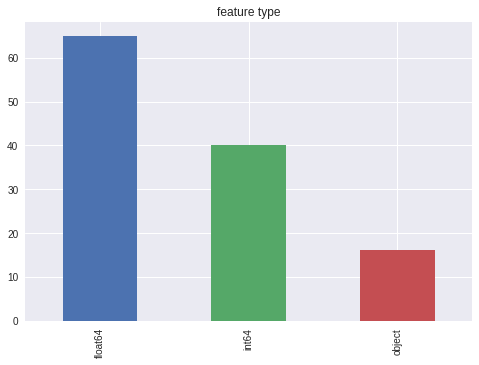

float64    65
int64      40
object     16
dtype: int64

In [0]:
total_data.dtypes.value_counts().plot.bar()
plt.title("feature type")
plt.show()

total_data.dtypes.value_counts()

In [0]:
# データフレームのタイプを指定して抽出
train_objectlist=total_data.select_dtypes(include=['object'])
train_objectlist

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
5,Cash loans,M,N,Y,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Other,NaN,NaN,NaN,NaN
6,Cash loans,F,Y,Y,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Accountants,SUNDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
7,Cash loans,M,Y,Y,Unaccompanied,State servant,Higher education,Married,House / apartment,Managers,MONDAY,Other,NaN,NaN,NaN,NaN
8,Cash loans,F,N,Y,Children,Pensioner,Secondary / secondary special,Married,House / apartment,No work,WEDNESDAY,XNA,NaN,NaN,NaN,NaN
9,Revolving loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,THURSDAY,Electricity,NaN,NaN,NaN,NaN


### コード

In [0]:
# One-Hot Encoder
total_data = pd.get_dummies(total_data)

print('total_data Features shape: ', total_data.shape)

total_data Features shape:  (356255, 183)


In [0]:
total_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0,0,0,0,0,0,0,0,0,0
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,0,0,0,0


トレーニングデータとテストデータの両方に同じ機能（列）が必要なので、整形します。  
この時、列に基づいてデータフレームを整列させるためにaxis = 1を設定する

In [0]:
'''
不要になったので備忘録

# trainのTARGETカラムは唯一の変数で消えては困るので抽出
train_labels = train['TARGET']

# トレーニングとテストのデータを整列させ、両方のデータフレームに存在する列のみを維持する(join = 'inner')
train, test = train.align(test, join = 'inner', axis = 1)

# ターゲットを戻す
train['TARGET'] = train_labels

print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

'''

"\n不要になったので備忘録\n\n# trainのTARGETカラムは唯一の変数で消えては困るので抽出\ntrain_labels = train['TARGET']\n\n# トレーニングとテストのデータを整列させ、両方のデータフレームに存在する列のみを維持する(join = 'inner')\ntrain, test = train.align(test, join = 'inner', axis = 1)\n\n# ターゲットを戻す\ntrain['TARGET'] = train_labels\n\nprint('Training Features shape: ', train.shape)\nprint('Testing Features shape: ', test.shape)\n\n"

In [0]:
total_data.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('uint8'), dtype('bool')],
      dtype=object)

In [0]:
print('total_data: ', total_data.shape)

total_data:  (356255, 73)


ラベルエンコーダーを使う前を確認  
'NAME_CONTRACT_TYPEを例に確認する

In [0]:
total_data['NAME_CONTRACT_TYPE'].unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [0]:
# ラベルエンコーダー

# label encoder のオブジェクトを生成する
le = LabelEncoder()
le_count = 0

for col in total_data:
    if total_data[col].dtype == 'object':
        if len(list(total_data[col].unique())) <= 2:
            le.fit(total_data[col])
            
            total_data[col] = le.transform(total_data[col])
            test[col] = le.transform(test[col])
            
            #何を いくつ変換したか記録する
            print(col)
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

NAME_CONTRACT_TYPE
FLAG_OWN_CAR
FLAG_OWN_REALTY
3 columns were label encoded.


エンコーダー使った後を確認

In [0]:
total_data['NAME_CONTRACT_TYPE'].unique()

array([0, 1])

その他のカテゴリー変数の確認  
変化の差を見ておく

In [0]:
total_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,0,M,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,100003,0,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004,1,M,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,100006,0,F,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0.005808,0.006281,0.029995,0.231697,0.304399,1.911564
4,100007,0,M,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# not use

###  XGBoost

「記録」XGBoostのGridSearchCVされたparam

cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 4, 6], 'n_estimators': [50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0

In [0]:
xgb_params = {
    base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
        max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
        n_jobs=1, nthread=None, objective='binary', random_state=0,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
        silent=True, subsample=1


In [0]:
# XGBoost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# XGBoostのパラメータ設定
xgb_params = {
        base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
        max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
        n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
        silent=True, subsample=1}

print("Parameter optimization")
xgb_model = xgb.XGBRegressor()
reg_xgb = GridSearchCV(xgb_model,
                                          {'max_depth': [2,4,6],
                                            'n_estimators': [50,100,200]},)
                                             # cv=2, n_jobs=-1)
reg_xgb.fit(X_train, y_train)

Parameter optimization


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 4, 6], 'n_estimators': [50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### Neural Network

In [0]:
# Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))

    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

model = KerasRegressor(build_fn=create_model, verbose=0)
# define the grid search parameters
optimizer = ['SGD','Adam']
batch_size = [10, 30, 50]
epochs = [10, 50, 100]
param_grid = dict(optimizer=optimizer, batch_size=batch_size, epochs=epochs)
reg_dl = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
reg_dl.fit(X_train, y_train)

### Support Vector Regressor

In [0]:
# SVR
from sklearn.svm import SVR

reg_svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})
reg_svr.fit(X_train, y_train)


### second feature matrix


In [0]:
# second feature matrix
X_train2 = pd.DataFrame( {'XGB': reg_xgb.predict(X_test),
     'DL': reg_dl.predict(X_test).ravel(),
     'SVR': reg_svr.predict(X_test),
    })


### skorch

PyTorchのsklearnラッパー
sklearnのインターフェースでPyTorchを使える

In [0]:
# PyTorchのインストール
#!pip install -q http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl


    100% |████████████████████████████████| 61kB 5.4MB/s 
    100% |████████████████████████████████| 2.0MB 13.4MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [0]:
# GPUがenabledか確認
import torch
torch.cuda.is_available()
# True が返ればGPUがPyTorchから使えている。

True

In [0]:
# skorchのインストール
!pip install skorch

In [0]:
import torch
from torch import nn
import torch.nn.functional as F
torch.manual_seed(0)

import numpy as np
from sklearn.model_selection import train_test_split


# ネットワークの定義
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.dense0 = nn.Linear(4, 6)
        self.dense1 = nn.Linear(6, 6)
        self.output = nn.Linear(6, 3)

    def forward(self, x):
        h = F.relu(self.dense0(x))
        h = F.relu(self.dense1(h))
        y = self.output(h)
        return y


from skorch import NeuralNetClassifier
# 分類器を作る
clf = NeuralNetClassifier(
    Classifier,
    optimizer=torch.optim.Adam, # default=torch.optim.SGD
    criterion=torch.nn.CrossEntropyLoss, # default=torch.nn.NLLLoss
    max_epochs=40,
    lr=0.1, # default=0.01
    iterator_train__batch_size=20, # default=128
    iterator_train__shuffle=True
)

# 学習
clf.fit(X_train, y_train)

# 予測
predicted_by_clf = clf.predict(X_test)
print("Accuracy {:.2f}".format(sum(x for x in y_test == predicted_by_clf) / y_test.shape[0]))

ModuleNotFoundError: ignored

In [0]:
NeuralNetClassifier.__path__

NameError: ignored